# Perceptron pour le reconnaissance de chiffres manuscrits

L'objectif de ce TP est de reconnaître des chiffres manuscrits d'une base de test à partir d'une base d'apprentissage et des réseaux de neurones. Les chiffres ont été normalisés et centrés dans une image de taille fixe $28\times 28$ pixels. 

On va travailler sur 2 bases de données de MNIST:
    - Standard: les chiffres manuscrits comprend un ensemble de 60 000 exemples d'apprentissage et un ensemble de 10 000 exemples de test. On va classifier 10 catégories de chiffres par perceptron (mono/multi couche).
    - DeepFake: l'idée est de distinguer les données Générées par un Modèle Générative GAN par apport aux chiffres manuscrits standard. On dispose de 4932x2 exemples d'apprentissage du chiffre 0 avec label real (standard), et label fake (généré). On va évaluer un modèle de classification binaire sur 991x2 exemples de test.

In [1]:
# importer des librairies avec tensorflow==1.15 , keras==2.3.1
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential


2024-05-22 16:38:57.659401: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 16:38:57.689486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 16:38:57.878974: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 16:38:57.879035: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 16:38:57.879818: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# Chargement des données
### Standard

In [46]:
# Nombre de classes
num_classes = 10

# Chargement base d'apprentissage et de test 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalisation 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 784)
60000 train samples
10000 test samples


# Perceptron mono couche
### Standard

In [47]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(10, activation="softmax", input_dim=784))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4139 - acc: 0.8891 - val_loss: 0.2924 - val_acc: 0.9181
Epoch 2/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2929 - acc: 0.9184 - val_loss: 0.2731 - val_acc: 0.9240
Epoch 3/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2767 - acc: 0.9220 - val_loss: 0.2761 - val_acc: 0.9228
Epoch 4/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2678 - acc: 0.9261 - val_loss: 0.2698 - val_acc: 0.9260
Epoch 5/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2629 - acc: 0.9265 - val_loss: 0.2692 - val_acc: 0.9259
Epoch 6/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2592 - acc: 0.9283 - val_loss: 0.2666 - val_acc: 0.9271
Epoch 7/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2554 - acc: 0.9297 - val_loss: 0.2678 - val_acc: 0.9264
Epoch 8/10
3750/3750 [==============================] -

In [49]:
# Analyse des résultats 

def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

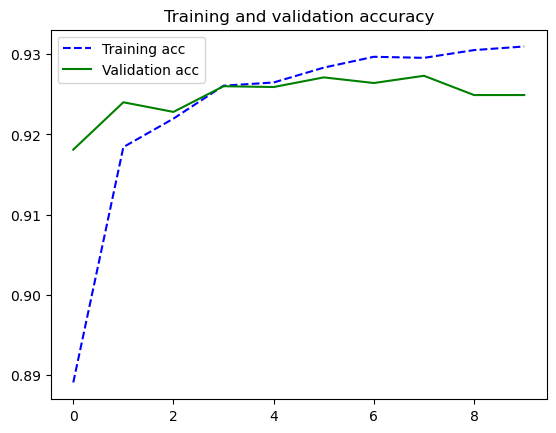

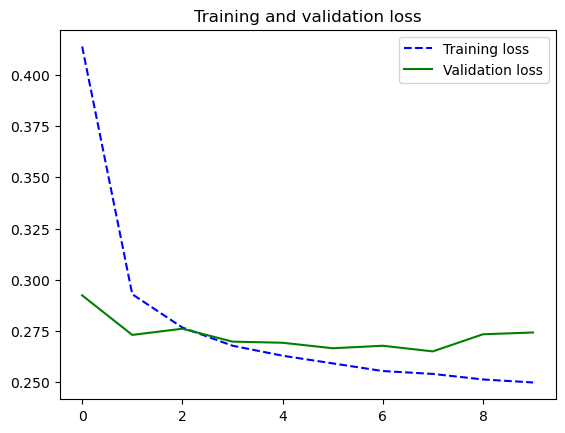

In [50]:
plot_training_analysis()

# Perceptron Multi-couches
### Standard

In [58]:
# Création de l'architecture
model = Sequential()
model.add(Dense(800, activation="relu", input_dim=784))
model.add(Dense(800, activation="relu", input_dim=800))
model.add(Dense(10, activation="softmax", input_dim=800))
#model.add(layers.Dropout(0.2))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 800)               628000    
                                                                 
 dense_49 (Dense)            (None, 800)               640800    
                                                                 
 dense_50 (Dense)            (None, 10)                8010      


                                                                 
Total params: 1276810 (4.87 MB)
Trainable params: 1276810 (4.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
3750/3750 [==============================] - 46s 12ms/step - loss: 0.2519 - acc: 0.9288 - val_loss: 0.1232 - val_acc: 0.9638
Epoch 2/10
3750/3750 [==============================] - 45s 12ms/step - loss: 0.0953 - acc: 0.9714 - val_loss: 0.0918 - val_acc: 0.9702
Epoch 3/10
3750/3750 [==============================] - 38965s 10s/step - loss: 0.0605 - acc: 0.9817 - val_loss: 0.0690 - val_acc: 0.9775
Epoch 4/10
3750/3750 [==============================] - 47s 12ms/step - loss: 0.0410 - acc: 0.9870 - val_loss: 0.0603 - val_acc: 0.9796
Epoch 5/10
3750/3750 [==============================] - 46s 12ms/step - loss: 0.0274 - acc: 0.9920 - val_loss: 0.0628 - val_acc: 0.9807
Epoch 6/10
3750/3750 [==============================] - 45s 12ms/step - loss: 0.0199 - acc: 0.9940 - val_loss: 0.0595 - val_acc: 0.9808
Epoch 7/10
3750/3750 [==============================] - 46s 12ms/step - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0723 - val_acc: 0.9799
Epoch 8/10
3750/3750 [========================

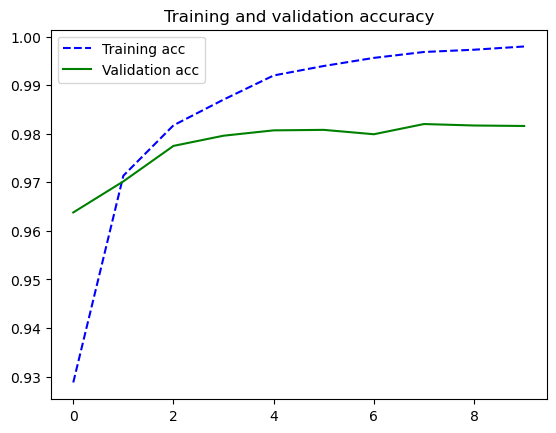

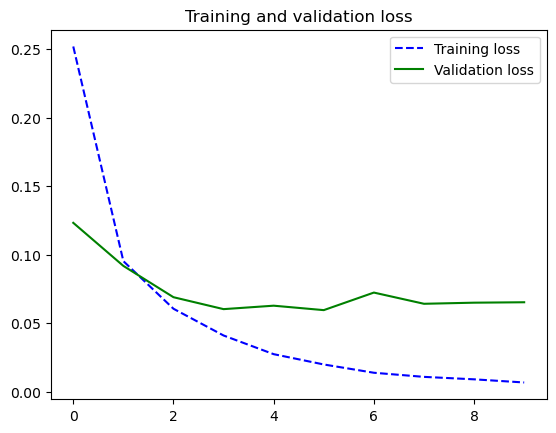

In [59]:
# Optimisation du modèle

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=16)

# Analyse des résultats
plot_training_analysis()

# Chargement des données
### DeepFake

In [60]:
# Nombre de classes
num_classes = 2

# Utiliser read_real_data et read_fake_data
# dans utils pour charger les donnees
from utils import read_real_data, read_fake_data

x_train_real = read_real_data('real_mnist_digit0_train')
x_train_fake = read_fake_data('fake_mnist_digit0_train')
x_test_real = read_real_data('real_mnist_digit0_val')
x_test_fake = read_fake_data('fake_mnist_digit0_val')

x_train = np.concatenate([x_train_real,x_train_fake],axis=0)
x_test = np.concatenate([x_test_real,x_test_fake],axis=0)

print('x_train',x_train.shape)
print('x_test',x_test.shape)

# Build y_train et y_test for x_train and x_test
# Denote the label real by 0
# Denote the label fake by 1
y_train = np.ones(x_train.shape[0])
y_train[:x_train_real.shape[0]] = 0

y_test = np.ones(x_test.shape[0])
y_test[:x_test_real.shape[0]] = 0

# Shuffle (a test)
rng_state = np.random.get_state()
arr1 = np.arange(10)
arr2 = np.arange(10)
np.random.shuffle(arr1)
np.random.set_state(rng_state)
np.random.shuffle(arr2)
print(arr1)
print(arr2)

# Shuffle training and test images and labels in a random order (index) 
rng_state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(rng_state)
np.random.shuffle(y_train)

rng_state = np.random.get_state()
np.random.shuffle(x_test)
np.random.set_state(rng_state)
np.random.shuffle(y_test)

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


read_real_data (4932, 28, 28)
read_fake_data (4932, 28, 28)
read_real_data (991, 28, 28)
read_fake_data (991, 28, 28)
x_train (9864, 28, 28)
x_test (1982, 28, 28)
[8 9 5 0 7 2 3 6 1 4]
[8 9 5 0 7 2 3 6 1 4]
x_train shape: (9864, 784)
9864 train samples
1982 test samples


[1. 0.]


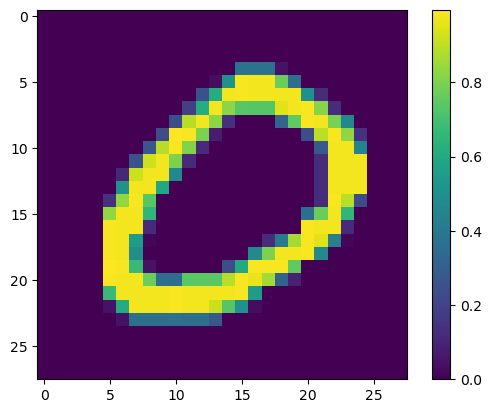

In [61]:
# Visualize une image
img = x_train[0,:].reshape(28,28)
plt.imshow(img)
plt.colorbar()

# Representation d'un label
label = y_test[0]
print(label)

# Perceptron mono couche
### DeepFake

In [62]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(2, activation="softmax", input_dim=784))
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 2)                 1570      
                                                                 
Total params: 1570 (6.13 KB)
Trainable params: 1570 (6.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
617/617 [==============================] - 2s 2ms/step - loss: 0.6294 - acc: 0.6579 - val_loss: 0.5565 - val_acc: 0.7694
Epoch 2/10
617/617 [==============================] - 1s 2ms/step - loss: 0.5141 - acc: 0.8237 - val_loss: 0.4761 - val_acc: 0.8456
Epoch 3/10
617/617 [==============================] - 2s 3ms/step - loss: 0.4404 - acc: 0.8731 - val_loss: 0.4044 - val_acc: 0.8966
Epoch 4/10
617/617 [==============================] - 2s 3ms/step - loss: 0.3851 - acc: 0.9055 - val_loss: 0.3786 - val_acc: 0.8769
Epoch 5/10
617/617 [==============================] - 2s 3ms/step - loss: 0.3472 - acc: 0.9129 - val_loss: 0.3313 - val_acc: 0.9183
Epoch 6/10
617/617 [==============================] - 2s 3ms/step - loss: 0.3151 - acc: 0.9251 - val_loss: 0.3075 - val_acc: 0.9193
Epoch 7/10
617/617 [==============================] - 2s 3ms/step - loss: 0.2882 - acc: 0.9358 - val_loss: 0.2839 - val_acc: 0.9268
Epoch 8/10
617/617 [==============================] - 2s 3ms/step - loss: 0.

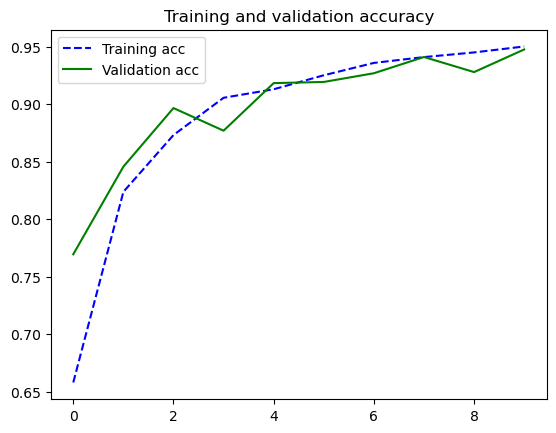

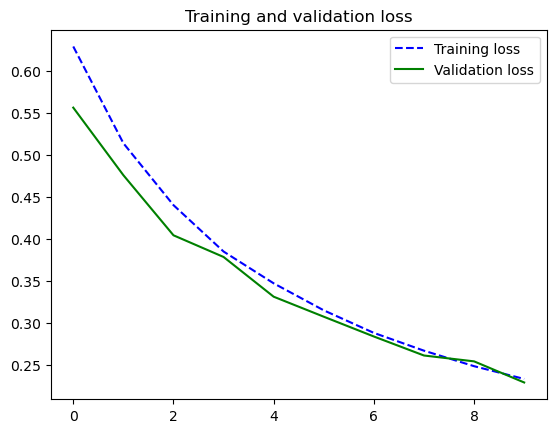

In [63]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

# Analyse des résultats
plot_training_analysis()

# Perceptron Multi-couches
### DeepFake

In [66]:
# Création de l'architecture
model = Sequential()
model.add(Dense(800, activation="relu", input_dim=784))
model.add(Dense(800, activation="relu", input_dim=800))
model.add(Dense(2, activation="softmax", input_dim=800))
#model.add(layers.Dropout(0.2))
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 800)               628000    
                                                                 
 dense_56 (Dense)            (None, 800)               640800    
                                                                 
 dense_57 (Dense)            (None, 2)                 1602      
                                                                 
Total params: 1270402 (4.85 MB)
Trainable params: 1270402 (4.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
617/617 [==============================] - 8s 12ms/step - loss: 0.4475 - acc: 0.7792 - val_loss: 0.3152 - val_acc: 0.8446
Epoch 2/10
617/617 [==============================] - 8s 13ms/step - loss: 0.1932 - acc: 0.9221 - val_loss: 0.1356 - val_acc: 0.9475
Epoch 3/10
617/617 [==============================] - 8s 12ms/step - loss: 0.1428 - acc: 0.9428 - val_loss: 0.1701 - val_acc: 0.9354
Epoch 4/10
617/617 [==============================] - 8s 12ms/step - loss: 0.1201 - acc: 0.9539 - val_loss: 0.0994 - val_acc: 0.9591
Epoch 5/10
617/617 [==============================] - 8s 12ms/step - loss: 0.1065 - acc: 0.9588 - val_loss: 0.0782 - val_acc: 0.9723
Epoch 6/10
617/617 [==============================] - 8s 12ms/step - loss: 0.1033 - acc: 0.9594 - val_loss: 0.0834 - val_acc: 0.9717
Epoch 7/10
617/617 [==============================] - 8s 13ms/step - loss: 0.0713 - acc: 0.9721 - val_loss: 0.0724 - val_acc: 0.9743
Epoch 8/10
617/617 [==============================] - 8s 12ms/step - 

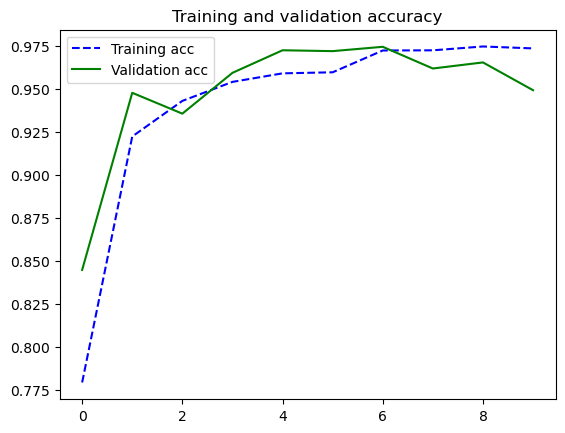

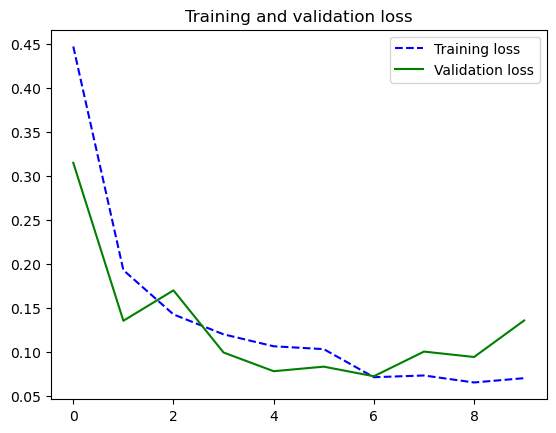

In [67]:
# Optimisation du modèle

opt = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=16)

# Analyse des résultats
plot_training_analysis()